<a href="https://colab.research.google.com/github/CodeChivalry/GPT-Neo-GPT-2/blob/main/NEO_ON_DREADDIT_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive to a local directory in Colab
drive.mount('/content/drive')

# You'll be prompted to enter an authorization code, follow the link and enter the code.

# Now, you can access your Google Drive files in the '/content/drive/' directory.


Mounted at /content/drive


In [ ]:
# Define the path to the folder you want to access
folder_path = '/content/drive/My Drive/Mental Health/'


# List the contents of the folder
!ls "$folder_path"


dreaddit-train.csv


In [ ]:
import pandas as pd

# Read a CSV file from the folder
file_path = folder_path + 'dreaddit-train.csv'
df = pd.read_csv(file_path)

# Now you can work with the 'df' DataFrame



In [ ]:
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [ ]:
# Keep only the "text" and "label" columns
df = df[['text', 'label']]


In [ ]:
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 28.2 MB/s eta 0:00:00


In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
# Install helper functions.
!pip install -q git+https://github.com/gmihaila/ml_things.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 838.0 kB/s eta 0:00:00


In [ ]:
pip install accelerate -U

In [ ]:
!pip install torch

In [ ]:
!pip install scikit-learn


In [ ]:
import torch
from transformers import GPTNeoForSequenceClassification, GPT2Tokenizer, Trainer, TrainingArguments
import pandas as pd

# Define the task
task_name = "emotion_classification"
num_labels = 2  # Number of emotion labels (assuming 2 labels)

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('EleutherAI/gpt-neo-125M')

# Load a pre-trained GPT-Neo model
model = GPTNeoForSequenceClassification.from_pretrained('EleutherAI/gpt-neo-125M', num_labels=num_labels)

# Add a padding token
tokenizer.add_special_tokens({'pad_token': '<|pad|>'})
model.config.pad_token_id = tokenizer.pad_token_id

# Add a classification head on top of the model
model.resize_token_embeddings(len(tokenizer))
model.classifier = torch.nn.Linear(model.config.hidden_size, num_labels)

# Load your DataFrame containing "text" and "label" columns
# Replace 'emotion3.csv' with your CSV file path


# Extract the "text" and "label" columns from the DataFrame
dialogues = df['text'].tolist()
emotion_labels = df['label'].tolist()
# Tokenize and pad the sequences
encodings = tokenizer(dialogues, truncation=True, padding='max_length', max_length=64)  # Adjust max_length as needed

class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


split_ratio = 0.8  # Adjust this ratio as needed
split_idx = int(len(dialogues) * split_ratio)

train_encodings = {key: val[:split_idx] for key, val in encodings.items()}
val_encodings = {key: val[split_idx:] for key, val in encodings.items()}
train_labels = emotion_labels[:split_idx]
val_labels = emotion_labels[split_idx:]

train_dataset = EmotionDataset(train_encodings, train_labels)
val_dataset = EmotionDataset(val_encodings, val_labels)


Loading the tokenizer from the `special_tokens_map.json` and the `added_tokens.json` will be removed in `transformers 5`,  it is kept for forward compatibility, but it is recommended to update your `tokenizer_config.json` by uploading it again. You will see the new `added_tokens_decoder` attribute that will store the relevant information.


Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-125M and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 50258. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [ ]:
print(train_dataset)

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Fine-tune the model with adjusted training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=20,
    per_device_train_batch_size=16,  # Reduce batch size
    per_device_eval_batch_size=20,   # Reduce batch size
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 small batches
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)



In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

# Deploy the model
model.save_pretrained('emotion_classification_model')
tokenizer.save_pretrained('emotion_classification_tokenizer')



Epoch,Training Loss,Validation Loss
0,No log,1.166186
2,No log,0.701620
4,No log,0.543337
6,No log,0.622029
8,No log,0.892818
10,No log,0.931788
12,No log,0.969744
14,0.337300,0.992838
16,0.337300,1.027667
18,0.337300,1.045149


('emotion_classification_tokenizer/tokenizer_config.json',
 'emotion_classification_tokenizer/special_tokens_map.json',
 'emotion_classification_tokenizer/vocab.json',
 'emotion_classification_tokenizer/merges.txt',
 'emotion_classification_tokenizer/added_tokens.json')

In [ ]:
## Convert the validation dataset into a list of dictionaries
val_data = []
for i in range(len(val_dataset)):
    val_data.append({
        "text": tokenizer.decode(val_dataset.encodings['input_ids'][i], skip_special_tokens=True),
        "label": val_dataset.labels[i]
    })

# Create a DataFrame from the list of dictionaries
val_df = pd.DataFrame(val_data)

# Now you have a DataFrame val_df containing "text" and "label" columns with the actual dialogue text
# You can use this DataFrame for further analysis or evaluation


spaces_between_special_tokens is deprecated and will be removed in transformers v5. It was adding spaces between `added_tokens`, not special tokens, and does not exist in our fast implementation. Future tokenizers will handle the decoding process on a per-model rule.


In [ ]:
val_df

,text,label
0,I would also paint a picture for the person wh...,0
1,I'm assuming I have PTSD and my work gave me a...,1
2,"Back ground, me and my girl have been homeless...",1
3,"Hey, I recently came into a bit of money. I li...",0
4,"However, today I was sitting at work and for w...",1
...,...,...
563,"* Her, a week ago: Precious, how are you? (I i...",0
564,I don't have the ability to cope with it anymo...,1
565,In case this is the first time you're reading ...,0
566,Do you find this normal? They have a good rela...,0


In [ ]:
import torch
import pandas as pd
from transformers import GPT2Tokenizer, GPTNeoForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score

# Load the fine-tuned model and tokenizer
model = GPTNeoForSequenceClassification.from_pretrained('emotion_classification_model')
tokenizer = GPT2Tokenizer.from_pretrained('emotion_classification_tokenizer')

# Load the validation dataset
# Assuming you have a DataFrame named val_df with "text" and "label" columns
val_dialogues = val_df['text'].tolist()
val_labels = val_df['label'].tolist()



Some weights of the model checkpoint at emotion_classification_model were not used when initializing GPTNeoForSequenceClassification: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing GPTNeoForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPTNeoForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
val_encodings = tokenizer(val_dialogues, truncation=True, padding='max_length', max_length=64)



In [ ]:
import torch
import pandas as pd
from transformers import GPT2Tokenizer, GPTNeoForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import DataLoader  # Add this import

# Load the fine-tuned model and tokenizer
model = GPTNeoForSequenceClassification.from_pretrained('emotion_classification_model')
tokenizer = GPT2Tokenizer.from_pretrained('emotion_classification_tokenizer')
tokenizer.add_special_tokens({'pad_token': ''})  # Use an empty string as the padding token

# Load the validation dataset
# Assuming you have a DataFrame named val_df with "text" and "label" columns
val_dialogues = val_df['text'].tolist()
val_labels = val_df['label'].tolist()
val_encodings = tokenizer(val_dialogues, truncation=True, padding='max_length', max_length=64)

# Create a dataset for validation
class EmotionValidationDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.encodings['input_ids'][idx])
        attention_mask = torch.tensor(self.encodings['attention_mask'][idx])
        label = torch.tensor(self.labels[idx])
        return input_ids, attention_mask, label

    def __len__(self):
        return len(self.labels)

# Create the validation dataset
val_dataset = EmotionValidationDataset(val_encodings, val_labels)

# Create a DataLoader for the validation dataset
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Put the model in evaluation mode
model.eval()

all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, attention_mask, labels = batch  # Unpack the batch into individual tensors
        input_ids = input_ids.to(model.device)
        attention_mask = attention_mask.to(model.device)
        labels = labels.to(model.device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1).cpu().numpy()

        all_predictions.extend(predicted_labels.tolist())
        all_labels.extend(labels.cpu().numpy().tolist())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(all_labels, all_predictions, output_dict=True)

# Convert the report dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Print the evaluation report as a table
print(report_df)


Some weights of the model checkpoint at emotion_classification_model were not used when initializing GPTNeoForSequenceClassification: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing GPTNeoForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPTNeoForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Accuracy: 0.7764
              precision    recall  f1-score     support
0              0.763052  0.736434  0.749507  258.000000
1              0.786834  0.809677  0.798092  310.000000
accuracy       0.776408  0.776408  0.776408    0.776408
macro avg      0.774943  0.773056  0.773800  568.000000
weighted avg   0.776032  0.776408  0.776024  568.000000


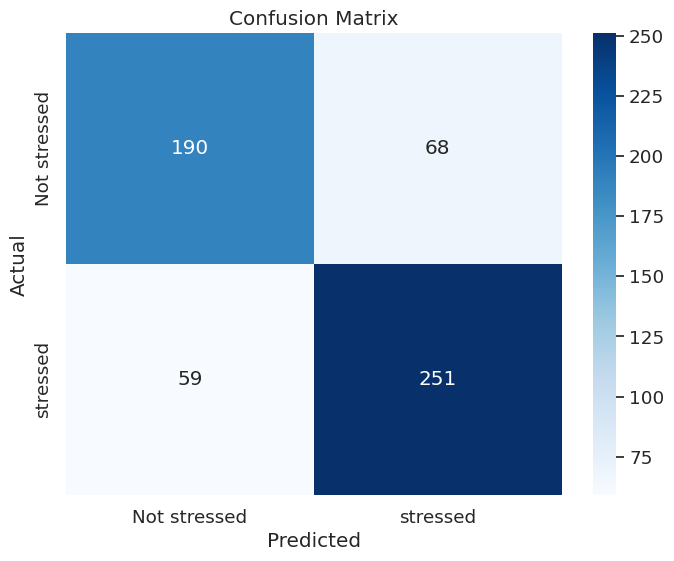

In [ ]:
import torch
import pandas as pd
from transformers import GPT2Tokenizer, GPTNeoForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
# Define class labels
class_labels = ['Not stressed', 'stressed']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better visibility
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Shape of dialogues:", len(dialogues))
print("Shape of emotion_labels:", len(emotion_labels))
# Print other relevant information


Shape of dialogues: 2838
Shape of emotion_labels: 2838


In [ ]:
print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
# Optionally, print a few samples from both datasets


Train dataset size: 2270
Validation dataset size: 568
